# 1. Import Library

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.term

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

# 2. Data Cleaning

In [6]:
df.term = df.term.str.strip(' months')

In [7]:
df.term.value_counts()

36    337953
60    128332
Name: term, dtype: int64

Menghilangkan kolom yang tidak ada datanya sama sekali

In [8]:
df = df.drop(['id', 'member_id', 'Unnamed: 0', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
             'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
             'all_util', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'inq_fi', 'total_cu_tl',
             'inq_last_12m'], axis = 1)


Menghilangkan kolom yang tidak perlu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

In [10]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [11]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [12]:
df = df[df["loan_status"].str.contains('Does not meet the credit policy. Status:Fully Paid') == False]
df = df[df["loan_status"].str.contains('Does not meet the credit policy. Status:Charged Off') == False]

In [13]:
df.shape

(463536, 55)

In [14]:
df.loan_status.value_counts()

Current               224226
Fully Paid            184739
Charged Off            42475
Late (31-120 days)      6900
In Grace Period         3146
Late (16-30 days)       1218
Default                  832
Name: loan_status, dtype: int64

# 3. Target Variable

In [15]:
df['good_bad'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                         'In Grace Period', 'Late (16-30 days)']), 1, 0)
df['good_bad']

0         0
1         1
2         0
3         0
4         0
         ..
466280    0
466281    1
466282    0
466283    0
466284    0
Name: good_bad, Length: 463536, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463536 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    463536 non-null  int64  
 1   funded_amnt                  463536 non-null  int64  
 2   funded_amnt_inv              463536 non-null  float64
 3   term                         463536 non-null  object 
 4   int_rate                     463536 non-null  float64
 5   installment                  463536 non-null  float64
 6   grade                        463536 non-null  object 
 7   sub_grade                    463536 non-null  object 
 8   emp_title                    436107 non-null  object 
 9   emp_length                   442562 non-null  object 
 10  home_ownership               463536 non-null  object 
 11  annual_inc                   463536 non-null  float64
 12  verification_status          463536 non-null  object 
 13 

# 4. Missing Value

In [17]:
missing_values = pd.DataFrame(df.isnull().sum()/df.shape[0])

In [18]:
df.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27429
emp_length                      20974
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           339976
purpose                             0
title                              18
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [19]:
missing_values.sort_values(0, ascending = False)

,0
mths_since_last_record,0.866724
mths_since_last_major_derog,0.786480
desc,0.733440
mths_since_last_delinq,0.537503
next_pymnt_d,0.490176
total_rev_hi_lim,0.145678
tot_cur_bal,0.145678
tot_coll_amt,0.145678
emp_title,0.059173
emp_length,0.045248


In [20]:
missing_values = pd.DataFrame(df.isnull().sum()/df.shape[0])
missing_values_filter = missing_values[missing_values[0] > 0.40]

In [21]:
missing_values_filter.sort_values(0, ascending = False)

,0
mths_since_last_record,0.866724
mths_since_last_major_derog,0.786480
desc,0.733440
mths_since_last_delinq,0.537503
next_pymnt_d,0.490176


In [22]:
df.drop(['mths_since_last_record', 'mths_since_last_major_derog', 'desc', 'mths_since_last_delinq', 'next_pymnt_d'], axis = 1, inplace = True)

In [23]:
missing_values = pd.DataFrame(df.isnull().sum()/df.shape[0])
missing_values_filter = missing_values[missing_values[0] > 0.40]
missing_values_filter.sort_values(0, ascending = False)

,0


In [24]:
loan_data = df

In [25]:
loan_data.select_dtypes(include = ['object', 'bool'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,60,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,36,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,36,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60,C,C2,Financial Advisor,4 years,MORTGAGE,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,773xx,TX,Apr-03,w,Jan-16,Jan-16,INDIVIDUAL
466281,60,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,377xx,TN,Jun-97,f,Dec-14,Jan-16,INDIVIDUAL
466282,60,D,D1,patrol,7 years,MORTGAGE,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,458xx,OH,Dec-01,f,Jan-16,Dec-15,INDIVIDUAL
466283,36,A,A4,Server Engineer Lead,3 years,OWN,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,913xx,CA,Feb-03,w,Dec-14,Apr-15,INDIVIDUAL


In [26]:
loan_data.select_dtypes(include = ['object', 'bool']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [27]:
for col in loan_data.select_dtypes(include = ['object', 'bool']).columns:
  print(col)
  print(loan_data[col].unique())
  print(loan_data[col].dtype)
  print()

term
['36' '60']
object

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']
object

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
object

emp_title
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']
object

emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
object

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
object

verification_status
['Verified' 'Source Verified' 'Not Verified']
object

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09'

In [28]:
loan_data.drop(['emp_title', 'title', 'zip_code', 'application_type', 'url'], axis = 1, inplace = True)

In [29]:
loan_data.term = pd.to_numeric(loan_data.term)

In [30]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [31]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')

loan_data['emp_length'].fillna(value = 0, inplace = True)
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])

<ipython-input-31-a37b1add1d14>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')


In [32]:
 loan_data.emp_length.unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [33]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463536 entries, 0 to 466284
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   463536 non-null  int64  
 1   funded_amnt                 463536 non-null  int64  
 2   funded_amnt_inv             463536 non-null  float64
 3   term                        463536 non-null  int64  
 4   int_rate                    463536 non-null  float64
 5   installment                 463536 non-null  float64
 6   grade                       463536 non-null  object 
 7   sub_grade                   463536 non-null  object 
 8   emp_length                  463536 non-null  int64  
 9   home_ownership              463536 non-null  object 
 10  annual_inc                  463536 non-null  float64
 11  verification_status         463536 non-null  object 
 12  issue_d                     463536 non-null  object 
 13  loan_status   

In [34]:
for col in loan_data.select_dtypes(include = ['int', 'float']).columns:
  print(col)
  print(loan_data[col].unique())
  print(loan_data[col].dtype)
  print()

loan_amnt
[ 5000  2500  2400 ... 33675 27775 33175]
int64

funded_amnt
[ 5000  2500  2400 ... 27775 33175 31725]
int64

funded_amnt_inv
[ 4975.  2500.  2400. ... 30425. 33125. 33625.]
float64

term
[36 60]
int64

int_rate
[10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10.37 16.4   7.66 10.   18.62 10.74  5.79  6.92  9.63 14.54 12.68
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  

In [35]:
loan_data.drop(['funded_amnt_inv', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'policy_code','collections_12_mths_ex_med', 'acc_now_delinq'], axis = 1, inplace = True)

In [36]:
for col in loan_data.select_dtypes(include = ['object', 'bool']).columns:
  print(col)
  print(loan_data[col].unique())
  print(loan_data[col].dtype)
  print()

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']
object

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
object

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
object

verification_status
['Verified' 'Source Verified' 'Not Verified']
object

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07' 'Dec-13'
 'Nov-13' 'Oct-13' 'Sep-13' 'Aug-13' 'Jul-13' 'Jun-13' 'May-13' 'Apr-13'
 'Mar-13' 'Feb-13' 'Jan

In [37]:
date_col = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

for col in date_col:
  loan_data[col] = loan_data[col].str.replace('-0', '-200')
  loan_data[col] = loan_data[col].str.replace('-1', '-201')
  loan_data[col] = loan_data[col].str.replace('-9', '-199')
  loan_data[col] = loan_data[col].str.replace('-8', '-198')
  loan_data[col] = loan_data[col].str.replace('-7', '-197')
  loan_data[col] = loan_data[col].str.replace('-6', '-197')
  loan_data[col] = pd.to_datetime(loan_data[col])

In [38]:
loan_data[date_col]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2016-01-01
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,2016-01-01
3,2011-12-01,1996-02-01,2015-01-01,2015-01-01
4,2011-12-01,1996-01-01,2016-01-01,2016-01-01
...,...,...,...,...
466280,2014-01-01,2003-04-01,2016-01-01,2016-01-01
466281,2014-01-01,1997-06-01,2014-12-01,2016-01-01
466282,2014-01-01,2001-12-01,2016-01-01,2015-12-01
466283,2014-01-01,2003-02-01,2014-12-01,2015-04-01


In [39]:
loan_data.drop('loan_status', axis = 1, inplace = True)

In [40]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463536 entries, 0 to 466284
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   loan_amnt                463536 non-null  int64         
 1   funded_amnt              463536 non-null  int64         
 2   term                     463536 non-null  int64         
 3   int_rate                 463536 non-null  float64       
 4   installment              463536 non-null  float64       
 5   grade                    463536 non-null  object        
 6   sub_grade                463536 non-null  object        
 7   emp_length               463536 non-null  int64         
 8   home_ownership           463536 non-null  object        
 9   annual_inc               463536 non-null  float64       
 10  verification_status      463536 non-null  object        
 11  issue_d                  463536 non-null  datetime64[ns]
 12  pymnt_plan      

In [41]:
loan_data_dum = pd.get_dummies(loan_data)
loan_data_dum.shape

(463536, 149)

In [42]:
loan_data_dum.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,earliest_cr_line,open_acc,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,5000,5000,36,10.65,162.87,10,24000.0,2011-12-01,1985-01-01,3.0,...,0,0,0,0,0,0,0,0,1,0
1,2500,2500,60,15.27,59.83,0,30000.0,2011-12-01,1999-04-01,3.0,...,0,0,0,0,0,0,0,0,1,0
2,2400,2400,36,15.96,84.33,10,12252.0,2011-12-01,2001-11-01,2.0,...,0,0,0,0,0,0,0,0,1,0
3,10000,10000,36,13.49,339.31,10,49200.0,2011-12-01,1996-02-01,10.0,...,0,0,0,0,0,0,0,0,1,0
4,3000,3000,60,12.69,67.79,1,80000.0,2011-12-01,1996-01-01,15.0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
from datetime import date

In [44]:
def date_columns(df, column):
  today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
  df[column] = pd.to_datetime(df[column], format = '%b-%y')
  df['mths_since_'+column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
  df.drop(columns = [column], inplace = True)

In [45]:
for col in date_col:
  date_columns(loan_data_dum, col)

In [46]:
ldd_missing = pd.DataFrame(loan_data_dum.isnull().sum())

In [47]:
ldd_missing = ldd_missing[ldd_missing[0] > 0]

In [48]:
ldd_missing

,0
revol_util,300
tot_coll_amt,67527
tot_cur_bal,67527
total_rev_hi_lim,67527
mths_since_last_pymnt_d,364
mths_since_last_credit_pull_d,40


In [49]:
missing_col = ['revol_util', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d']

In [50]:
for col in missing_col:
  loan_data_dum[col].fillna(loan_data_dum[col].median(), inplace = True)

In [51]:
ldd_missing = pd.DataFrame(loan_data_dum.isnull().sum())
ldd_missing = ldd_missing[ldd_missing[0] > 0]
ldd_missing

,0


In [52]:
for col in loan_data_dum.select_dtypes(include = ['int', 'float']).columns:
  print(col)
  print(loan_data_dum[col].unique())
  print(loan_data_dum[col].dtype)
  print()

loan_amnt
[ 5000  2500  2400 ... 33675 27775 33175]
int64

funded_amnt
[ 5000  2500  2400 ... 27775 33175 31725]
int64

term
[36 60]
int64

int_rate
[10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10.37 16.4   7.66 10.   18.62 10.74  5.79  6.92  9.63 14.54 12.68
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12.23 12.61 10.36
  6.17  6.54  9.25 16.69 15.95  8.88 13.35  9.62 1

In [53]:
column_minmax = loan_data_dum.select_dtypes(include = ['int', 'float']).columns
column_minmax

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'annual_inc', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'good_bad', 'mths_since_issue_d', 'mths_since_earliest_cr_line',
       'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d'],
      dtype='object')

In [54]:
column_minmax_list = list(column_minmax)
column_minmax_list

['loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'good_bad',
 'mths_since_issue_d',
 'mths_since_earliest_cr_line',
 'mths_since_last_pymnt_d',
 'mths_since_last_credit_pull_d']

In [55]:
column_minmax_list.remove('term')
column_minmax_list.remove('good_bad')
column_minmax_list

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'mths_since_issue_d',
 'mths_since_earliest_cr_line',
 'mths_since_last_pymnt_d',
 'mths_since_last_credit_pull_d']

# 5. Data Splitting

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), column_minmax_list))

In [57]:
loan_data_dum.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,open_acc,pub_rec,revol_bal,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,36,10.65,162.87,10,24000.0,3.0,0.0,13648,...,0,0,0,0,1,0,134.0,457.0,97.0,85.0
1,2500,2500,60,15.27,59.83,0,30000.0,3.0,0.0,1687,...,0,0,0,0,1,0,134.0,286.0,118.0,113.0
2,2400,2400,36,15.96,84.33,10,12252.0,2.0,0.0,2956,...,0,0,0,0,1,0,134.0,255.0,104.0,85.0
3,10000,10000,36,13.49,339.31,10,49200.0,10.0,0.0,5598,...,0,0,0,0,1,0,134.0,324.0,97.0,97.0
4,3000,3000,60,12.69,67.79,1,80000.0,15.0,0.0,27783,...,0,0,0,0,1,0,134.0,325.0,85.0,85.0


In [58]:
from sklearn.model_selection import train_test_split

X = loan_data_dum.drop('good_bad', axis = 1)
y = loan_data_dum['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [59]:
ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [60]:
y_train.value_counts(normalize = True)

0    0.882272
1    0.117728
Name: good_bad, dtype: float64

In [61]:
y_test.value_counts(normalize = True),

(0    0.882276
 1    0.117724
 Name: good_bad, dtype: float64,)

In [62]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((370828, 28), (370828,), (92708, 28), (92708,))

# 6. Modelling

In [63]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()

In [64]:
model_1.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred = model_1.predict(X_test)

In [66]:
result = pd.DataFrame(list(zip(y_pred, y_test)), columns = ['y_pred', 'y_test'])

In [67]:
result.head()

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9693446088794926

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

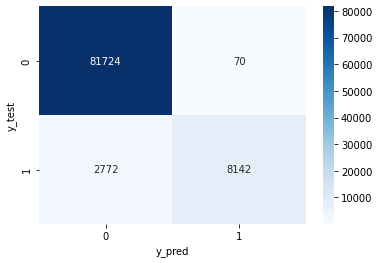

In [70]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, fmt='.0f', cmap = plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [71]:
model_1.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

In [72]:
model_1.predict_proba(X_test)

array([[9.99999995e-01, 4.96974910e-09],
       [9.99999837e-01, 1.63246150e-07],
       [9.51081677e-01, 4.89183230e-02],
       ...,
       [2.69786822e-06, 9.99997302e-01],
       [9.38478561e-01, 6.15214392e-02],
       [3.87115399e-05, 9.99961288e-01]])

In [73]:
y_pred = model_1.predict_proba(X_test)[:, 1]

In [74]:
y_pred > 5.0

array([False, False, False, ..., False, False, False])

In [75]:
(y_pred > 5.0).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

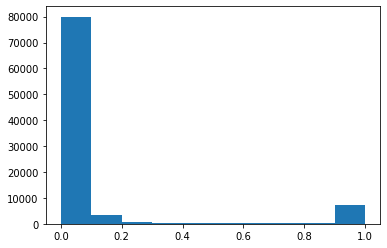

In [76]:
plt.hist(y_pred);

In [77]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [78]:
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.10551785946005708

In [79]:
y_pred = model_1.predict_proba(X_test)[:, 1]
y_pred = (y_pred > best_thresh).astype(int)

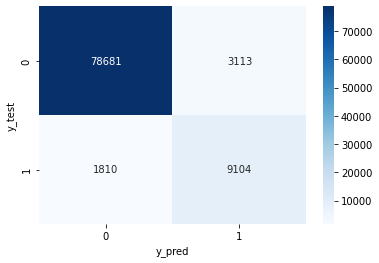

In [80]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, fmt='.0f', cmap = plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [81]:
accuracy_score(y_test, y_pred)

0.9468977865987833

In [82]:
model_1.coef_

array([[ 9.89692339e+00,  2.86049038e+01,  1.46288649e+00,
         8.07894678e+00, -4.95156327e-02, -2.70626204e+00,
         6.54422639e-01, -1.59521398e+00, -2.32135703e+00,
         1.65138421e+00,  6.56331174e-01, -1.95147739e+01,
        -1.95570833e+01, -1.56297312e+01,  8.08907940e-01,
        -3.93663746e+01,  6.89798346e+00,  1.88376505e+01,
         9.60044560e+00,  4.80634435e+00, -3.01897929e+01,
        -2.49166831e-02, -3.33973915e+00, -7.98583511e-01,
        -1.46778946e+00, -7.41000666e-01,  6.40690563e+00,
        -2.82590545e+00]])

In [83]:
X_train.shape, len(model_1.coef_[0])

((370828, 28), 28)

In [84]:
model_1.intercept_

array([-2.32774288])